In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ncvn\\.cache\\kagglehub\\datasets\\wcukierski\\enron-email-dataset\\versions\\2\\emails.csv")

In [2]:
VECTOR_DB_NAME = "email_faiss_normalized_e5"

In [3]:

print(df.head())  
print(df.info()) 
print(df.columns) 

                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB
None
Index(['file', 'message'], dtype='object')


In [4]:
df['file'][0]

'allen-p/_sent_mail/1.'

In [5]:
from pprint import pprint
pprint(df['message'][30000])

('Message-ID: <6440303.1075855883977.JavaMail.evans@thyme>\n'
 'Date: Sun, 10 Dec 2000 06:32:00 -0800 (PST)\n'
 'From: veronica.espinoza@enron.com\n'
 'To: debbie.brackett@enron.com, william.bradford@enron.com, \n'
 '\tandrew.conner@enron.com, genia.fitzgerald@enron.com, \n'
 '\tpatrick.hanse@enron.com, kelly.lovvorn@enron.com, \n'
 '\tmelissa.murphy@enron.com, kyle.schultz@enron.com, \n'
 '\tkim.theriot@enron.com, greg.wolfe@enron.com, \n'
 '\tchristian.yoder@enron.com, donald.black@enron.com, \n'
 '\twinston.cheng@enron.com, paul.choi@enron.com, \n'
 '\tdavid.fairley@enron.com, mike.miller@enron.com, \n'
 '\tpatrice.mims@enron.com, steve.neal@enron.com, \n'
 '\tkimberly.olinger@enron.com, charles.otto@enron.com, \n'
 '\tlee.papayoti@enron.com, david.parquet@enron.com, \n'
 '\tsusan.pereira@enron.com, beth.perlman@enron.com, \n'
 '\tbo.petersen@enron.com, sylvia.pollan@enron.com, \n'
 '\tbrent.price@enron.com, daniel.reck@enron.com, \n'
 '\tleslie.reeves@enron.com, brian.riley@enron.c

In [6]:
import random
str(df['message'][random.randint(0,5000)]).split()

['Message-ID:',
 '<31274667.1075855698684.JavaMail.evans@thyme>',
 'Date:',
 'Thu,',
 '25',
 'Jan',
 '2001',
 '04:49:00',
 '-0800',
 '(PST)',
 'From:',
 'phillip.allen@enron.com',
 'To:',
 'patti.sullivan@enron.com',
 'Subject:',
 'Analyst',
 'Interviews',
 'Needed',
 '-',
 '2/15/01',
 'Mime-Version:',
 '1.0',
 'Content-Type:',
 'text/plain;',
 'charset=us-ascii',
 'Content-Transfer-Encoding:',
 '7bit',
 'X-From:',
 'Phillip',
 'K',
 'Allen',
 'X-To:',
 'Patti',
 'Sullivan',
 'X-cc:',
 'X-bcc:',
 'X-Folder:',
 '\\Phillip_Allen_June2001\\Notes',
 'Folders\\All',
 'documents',
 'X-Origin:',
 'Allen-P',
 'X-FileName:',
 'pallen.nsf',
 'Patti,',
 'This',
 'sounds',
 'like',
 'an',
 'opportunity',
 'to',
 'land',
 'a',
 'couple',
 'of',
 'analyst',
 'to',
 'fill',
 'the',
 'gaps',
 'in',
 'scheduling.',
 'Remember',
 'their',
 'rotations',
 'last',
 'for',
 'one',
 'year.',
 'Do',
 'you',
 'want',
 'to',
 'be',
 'an',
 'interviewer?',
 'Phillip',
 '----------------------',
 'Forwarded',
 'b

In [7]:
import faiss
import numpy as np
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_experimental.text_splitter import SemanticChunker


# Use Microsoft E5 model instead of MPNet
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}  # Uses the cosine similarity
model = HuggingFaceEmbeddings(
    model_name="intfloat/e5-base-v2", #sentence-transformers/all-mpnet-base-v2
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)


C:\Users\ncvn\AppData\Local\Temp\ipykernel_18212\4187839505.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  model = HuggingFaceEmbeddings(
c:\DEV\WebdevFolder\RealEstateAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\DEV\WebdevFolder\RealEstateAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible

In [12]:
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=350, chunk_overlap=50)

text_splitter = SemanticChunker(model)
email_texts = df["message"].iloc[:100].dropna().tolist()

In [13]:
len(email_texts)

100

In [14]:
import re

def clean_text(text: str) -> str:
    """
    Cleans the input text by:
    - Removing all special characters except @, ., ,, ?, :, ;, -, _, and space.
    - Replacing multiple spaces with a single space.
    - Stripping leading and trailing spaces.
    """
    # Keep letters, numbers, email punctuation (such as @, ., ,), and common punctuation for sentences.
    text = re.sub(r'[^A-Za-z0-9@.,?;:!()&\-_\s]', '', text)  # Allow basic email punctuation and sentence symbols
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()  # Remove leading/trailing spaces


In [15]:
from langchain_core.documents import Document
import pprint


docslist = []
for i, ec in enumerate(email_texts):
    
    split_msg = ec.split()
    msg_start = split_msg.index("X-FileName:")
    sender = split_msg[split_msg.index("From:")+1]
    recips = []
    try:
        for idx in range(split_msg.index("To:")+1, split_msg.index("Subject:")):
            recips.append(split_msg[idx])
    except:
        for idx in range(split_msg.index("X-To:")+1, split_msg.index("Subject:")):
            recips.append(split_msg[idx])

    subject_start_idx = split_msg.index("Subject:")+1
    subject_end_idx = split_msg.index("Mime-Version:")

    date_idx = split_msg.index("Date:")+1
    date_idx_end = date_idx + 6

    full_content = clean_text(" ".join(split_msg[msg_start+3:]))

    prefix = {"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end]), 
              "subject":" ".join(split_msg[subject_start_idx:subject_end_idx])}
    
    final_list = text_splitter.split_text(full_content)
    for f in final_list:
        docslist.append(Document(metadata=prefix, page_content="passage: " + f))

In [ ]:
import numpy as np

def l2_normalize(embeddings: np.ndarray) -> np.ndarray:
    """
    L2-normalizes an array.
    If the input is 1D, normalize the whole vector.
    If it's 2D, normalize each row.
    """
    if embeddings.ndim == 1:
        norm = np.linalg.norm(embeddings)
        return embeddings / norm if norm != 0 else embeddings
    else:
        norm = np.linalg.norm(embeddings, axis=1, keepdims=True)
        norm[norm == 0] = 1  # avoid division by zero
        return embeddings / norm

# Extract text from Document objects
docs_texts = [doc.page_content for doc in docslist]  # Get only text content

# Generate embeddings for each text
embeddings = model.embed_documents(docs_texts)  # List[List[float]]

embeddings = l2_normalize(np.array(embeddings))  # Ensure it's NumPy and normalized



TypeError: expected str, bytes or os.PathLike object, not ndarray

In [20]:
np.save("embeddings.npy",embeddings)
# Create (text, embedding) pairs for FAISS
text_embedding_pairs = list(zip(docs_texts, embeddings))  # Convert np.array to list

# Store in FAISS
db = FAISS.from_embeddings(text_embedding_pairs, model, metadatas=[doc.metadata for doc in docslist])
db.save_local(VECTOR_DB_NAME)

In [ ]:
# from langchain_core.documents import Document
# import pprint

# docslist_no_lemma = []
# for i, ec in enumerate(email_texts):
#     #pprint.pprint(ec.split())
    
#     split_msg = ec.split()
#     msg_start = split_msg.index("X-FileName:")
#     sender = split_msg[split_msg.index("From:")+1]
#     recips = []
#     #print(f'EMAIL CHUNK {i}\n\n',ec.split()[msg_start+3:])
#     try:
#         for idx in range(split_msg.index("To:")+1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])
#     except:
#         for idx in range(split_msg.index("X-To:")+1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])

#     subject_start_idx = split_msg.index("Subject:")
#     subject_end_idx = split_msg.index("Mime-Version:")

#     date_idx = split_msg.index("Date:")+1
#     date_idx_end = date_idx + 6

#     full_content = " ".join(split_msg[subject_start_idx:subject_end_idx]) + "|"
#     full_content += " ".join(split_msg[msg_start+3:])

#     #docslist.append(Document(page_content=full_content, metadata={"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}))
#     prefix = {"sender":sender,"recipient":" ".join(recips),"date":" ".join(split_msg[date_idx : date_idx_end])}
#     #print(list(zip(prefix.keys(),prefix.values())))
#     final_list = text_splitter.split_text(full_content)
#     #print('final_list prepared')
#     #print(list(zip(prefix.keys(),prefix.values()))+final_list)
#     for f in final_list:
#         docslist_no_lemma.append(str(list(zip(prefix.keys(),prefix.values())))+f)

In [ ]:
len(email_texts)

50

In [ ]:
# from langchain_core.documents import Document
# import pprint
# import numpy as np

# # L2 Normalization function
# def l2_normalize(embeddings: np.ndarray) -> np.ndarray:
#     """Manually applies L2 normalization to embeddings."""
#     return embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
# email_texts2 = email_texts[:15]
# procd_texts = []
# docslist_no_lemma = []
# for i, ec in enumerate(email_texts2):
#     split_msg = ec.split()
#     msg_start = split_msg.index("X-FileName:")
#     sender = split_msg[split_msg.index("From:") + 1]
#     recips = []

#     try:
#         for idx in range(split_msg.index("To:") + 1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])
#     except:
#         for idx in range(split_msg.index("X-To:") + 1, split_msg.index("Subject:")):
#             recips.append(split_msg[idx])

#     subject_start_idx = split_msg.index("Subject:")
#     subject_end_idx = split_msg.index("Mime-Version:")

#     date_idx = split_msg.index("Date:") + 1
#     date_idx_end = date_idx + 6

#     full_content = " ".join(split_msg[subject_start_idx:subject_end_idx]) + "|"
#     full_content += " ".join(split_msg[msg_start + 3:])

#     prefix = {"sender": sender, "recipient": " ".join(recips), "date": " ".join(split_msg[date_idx:date_idx_end])}

#     final_list = text_splitter.split_text(full_content)
    
#     for f in final_list:
#         docslist_no_lemma.append(Document(metadata=prefix, page_content=f))
#         procd_texts.append(f)

# # Convert text documents to embeddings
# docs = [doc.page_content for doc in docslist_no_lemma]
# embeddings = np.array([model.embed_query(doc) for doc in docs])  # Convert to NumPy array

# # Apply manual L2 normalization to embeddings
# # embeddings = l2_normalize(embeddings)
# text_embedding_pairs = zip(procd_texts, embeddings)
# # Store normalized embeddings in FAISS
# db = FAISS.from_embeddings(text_embedding_pairs, docslist_no_lemma)
# db.save_local(VECTOR_DB_NAME)


In [ ]:
len(docslist)

99

In [ ]:


import asyncio
import concurrent.futures
from langchain_community.vectorstores import FAISS
def process_batch_sync(db, batch_docs, batch_id):
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    loop.run_until_complete(db.aadd_documents(batch_docs))
    loop.close()
    print(f"Batch {batch_id} added ({len(batch_docs)} docs).")

async def batch_insert(db, docslist, batch_size=20, num_workers=6):
    loop = asyncio.get_running_loop()
    
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        tasks = []
        
        for i in range(0, len(docslist), batch_size):
            batch_docs = docslist[i : i + batch_size]
            batch_id = i // batch_size
            tasks.append(loop.run_in_executor(executor, process_batch_sync, db, batch_docs, batch_id))
        
        await asyncio.gather(*tasks) 

# await batch_insert(db, docslist, batch_size=40)

In [ ]:
db.save_local(VECTOR_DB_NAME)
print("FAISS index updated and saved")

FAISS index updated and saved


In [ ]:
db = FAISS.load_local(VECTOR_DB_NAME,model,allow_dangerous_deserialization=True)

In [ ]:
model

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='intfloat/e5-base-v2', cache_folder=None, model_kwargs={'device': 'cpu'}, encode_kwargs={'normalize_embeddings': False}, multi_process=False, show_progress=False)

In [ ]:
from initialize_groq import init_groq
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.retrieval import create_retrieval_chain
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
        """
            Answer question only provided the context. Give a detailed answer IN minimum 5 sentences!
            SAY I DONT KNOW IF CONTEXT IS NOT ENOUGH. DONT MAKE UP ANSWERS. BUT YOU ARE FREE TO INFER/SUGGEST.
            {context}

            Here is question:
            {input}
        """
)

retriever = db.as_retriever(search_kwargs={'k':20, 'search_type':'mmr','lambda_mult':0.2})

_, llm = init_groq(model_name="llama-3.3-70b-versatile")
import random
from initialize_groq import api_keys
llm.groq_api_key = random.choice(api_keys)
document_chain = create_stuff_documents_chain(llm, prompt)
retrieval_chain = create_retrieval_chain(retriever, document_chain)

# Retrieve Top-K Similar Documents (Initial Broad Search)
retriever_topk = db.as_retriever(search_kwargs={'k': 20,'fetch_k' : 100, 'search_type': 'similarity'})  # Retrieve more docs first

# MMR for Diversity (Reduce Redundant Docs)
retriever_mmr = db.as_retriever(search_kwargs={'k': 20, 'fetch_k' : 100, 'search_type': 'mmr'})  

# Create the Hybrid Retrieval Pipeline
retrieval_chain_topk = create_retrieval_chain(retriever_topk, document_chain)  # Initial broad search
retrieval_chain_mmr = create_retrieval_chain(retriever_mmr, document_chain)    # Apply MMR re-ranking
# retrieval_chain_threshold = create_retrieval_chain(retriever_threshold, document_chain)  # Final filtering

In [ ]:
for d in docslist:
    print(d)

page_content='passage: Here is our forecast' metadata={'sender': 'phillip.allen@enron.com', 'recipient': 'tim.belden@enron.com', 'date': 'Mon, 14 May 2001 16:39:00 -0700', 'subject': ''}
page_content='passage: Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary. As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn.' metadata={'sender': 'phillip.allen@enron.com', 'recipient': 'john.lavorato@enron.com', 'date': 'Fri, 4 May 2001 13:51:00 -0700', 'subject': 'Re:'}
page_content='passage: The meetings might be better if held in a 

In [ ]:
import pprint
query = "give me emails related to price fixing"
pprint.pprint(retrieval_chain_topk.invoke({"input":query}))
llm.groq_api_key = random.choice(api_keys)
pprint.pprint(retrieval_chain_mmr.invoke({"input":query}))

{'answer': 'Based on the provided context, the emails related to price fixing '
           'are:\n'
           '\n'
           '1. The email from Phillip K Allen to Liane on September 28, 2000, '
           'at 10:56 AM, which discusses the potential manipulation of the El '
           'Paso San Juan monthly index. The email states that a single buyer '
           'entered the marketplace on both September 26 and 27 and paid above '
           'market prices for San Juan gas, potentially distorting the index.\n'
           '\n'
           '2. The email from Phillip K Allen on September 28, 2000, which '
           'reiterates the concern about the manipulation of the El Paso San '
           'Juan monthly index. The email provides a detailed analysis of the '
           'trades and argues that the trades at 4.70 and higher were above '
           'market trades that should be excluded from the calculation of the '
           'index.\n'
           '\n'
           'These two emails sugge

In [ ]:
query = "query: emails related to price fixing"
query_embedding = np.array(model.embed_query(query))
query_embedding = l2_normalize(query_embedding)  # Now a 1D vector normalized correctly

# Perform MMR search using the correctly shaped query embedding
mmr_scores = db.max_marginal_relevance_search_with_score_by_vector(
    embedding=query_embedding.tolist(),  # Pass as a list of floats
    k=20, fetch_k=100,lambda_mult=0.3
    
)

# Extract and display MMR results
mmr_list = sorted([(score, doc) for doc, score in mmr_scores], reverse=True)

for score, doc in mmr_list:
    print(f"Document: {doc.page_content[:10000]} {str(doc.metadata)[:10]} |MMR Score: {score}")


Document: passage: Keith {'sender': |MMR Score: 0.6687713265419006
Document: passage: Thank you, Phillip {'sender': |MMR Score: 0.6394423246383667
Document: passage: shoot for Tuesday at 11:45. {'sender': |MMR Score: 0.6343553066253662
Document: passage: successful. way to go!!! {'sender': |MMR Score: 0.6036736965179443
Document: passage: Here is our forecast {'sender': |MMR Score: 0.576933741569519
Document: passage: Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary. As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. {

In [ ]:
# for doc in docslist:
#     print(len(doc.page_content.split()))
    

In [ ]:
from langchain_core.tools import tool

# Ensure retrieval_chain is correctly defined before calling this tool
@tool
def ragtool(query: str) -> str:
    """
    This is a retrieval-augmented generation (RAG) tool that queries a vector store 
    containing Enron emails.
    
    Parameters:
    query (str): The input query for retrieval.
    
    Returns:
    str: The retrieved answer from the vector store.
    """
    try:
        answer = retrieval_chain_mmr.invoke({"input": query})['answer']
        return f"Here is the ANSWER. \n ```{answer}```\n DO NOT USE THE TOOL REPEATEDLY. SHOW THE ANSWER TO THE USER. \n"
    except Exception as e:
        return f"Error: Failed to retrieve answer. Details: {str(e)}"


In [ ]:
from typing import Literal
from langchain_core.runnables.history import RunnableWithMessageHistory
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain.memory import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langgraph.prebuilt import ToolNode, tools_condition



toolnode = ToolNode([ragtool])

def call_model(state: MessagesState):
    state["messages"]
    messages = state["messages"]
    #print(messages)
    llm.groq_api_key = random.choice(api_keys)
    llm_with_tool = llm.bind_tools([ragtool])
    response = llm_with_tool.invoke(messages)
    
    
    return {"messages": [response]}

from langgraph.graph import END
def router_function(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

memory = MemorySaver()
workflow = StateGraph(MessagesState)    
workflow.add_node("agent", call_model)
workflow.add_node(toolnode)
workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    router_function,
    {
       "tools": "tools",
       END: END,
    },
)
workflow.add_edge("tools", "agent")
app = workflow.compile(checkpointer=memory)



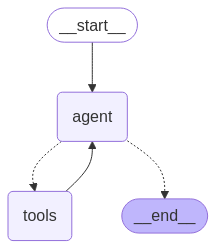

In [ ]:
from IPython.display import display_png
display_png(app.get_graph().draw_mermaid_png(),raw=True)

In [ ]:
import time
while True:
    theinput = input("Enter something: ")
    if 'exit' in theinput:
        break
    inp = {"messages":[theinput]}
    
    config = {"configurable": {"thread_id": 1}}
    events = app.stream(inp, config=config, stream_mode="values")

    for event in events:
        event["messages"][-1].pretty_print()
    time.sleep(1)

================================ Human Message =================================

what did i just ask you
================================== Ai Message ==================================
Tool Calls:
  ragtool (call_p3bn)
 Call ID: call_p3bn
  Args:
    query: emails about gas prices
================================= Tool Message =================================
Name: ragtool

Here is the ANSWER. 
 ```The provided passages appear to be a collection of emails and meeting invitations related to gas prices, trading, and financial transactions. Based on the context, it seems that the emails are discussing various aspects of the gas market, including price manipulation, index calculations, and trading strategies.

One of the main concerns discussed in the emails is the potential manipulation of the El Paso San Juan monthly index. A single buyer is suspected of entering the marketplace and paying above-market prices for San Juan gas, which could distort the index calculation. The emails also

In [ ]:
# from typing import Literal, List
# from langchain_core.runnables.history import RunnableWithMessageHistory
# from langgraph.graph import StateGraph, START, END, MessagesState
# from langgraph.checkpoint.memory import MemorySaver
# from langchain.memory import ChatMessageHistory
# from langchain_core.chat_history import BaseChatMessageHistory, InMemoryChatMessageHistory
# from langgraph.prebuilt import ToolNode
# from langchain_core.documents import Document
# from langchain_core.tools import tool
# from langchain.chat_models import ChatOpenAI
# from langchain_core.prompts import ChatPromptTemplate

# # === Define Custom Tools ===


# @tool
# def filter_emails_by_keyword(emails: List[Document], keywords: List[str]) -> List[Document]:
#     """Filter emails that contain the given keywords in the content or metadata."""
#     def filter_email(email):
#         content = email.page_content.lower()
#         metadata = " ".join(str(val).lower() for val in email.metadata.values())
#         return any(keyword.lower() in content or keyword.lower() in metadata for keyword in keywords)
    
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         filtered_emails = list(filter(None, executor.map(lambda e: e if filter_email(e) else None, emails)))

#     return filtered_emails

# @tool
# def filter_emails_by_metadata(
#     emails: List[Document], sender: str = None, recipient: str = None, date: str = None
# ) -> List[Document]:
#     """Filter emails by metadata fields like sender, recipient, or date."""
#     def filter_email(email):
#         if sender and email.metadata.get("sender", "").lower() != sender.lower():
#             return None
#         if recipient and recipient.lower() not in email.metadata.get("recipient", "").lower():
#             return None
#         if date and date not in email.metadata.get("date", ""):
#             return None
#         return email
    
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         filtered_emails = list(filter(None, executor.map(filter_email, emails)))
    
#     return filtered_emails

# @tool
# def summarize_emails(emails: List[Document]) -> List[Document]:
#     """Summarize emails before adding them to FAISS."""
#     _,llm = init_groq(model_name="llama-3.3-70b-versatile")
#     prompt = ChatPromptTemplate.from_template("Summarize the following email:\n{email}")
#     summarized_docs = []
#     for email in emails:
#         chain = prompt | llm
#         summary = chain.invoke(email.page_content)
#         summarized_docs.append(Document(page_content=summary.content, metadata=email.metadata))
#     return summarized_docs

# toolnode = ToolNode([ragtool, filter_emails_by_keyword, filter_emails_by_metadata, summarize_emails])
# llm_with_tool = llm.bind_tools([ragtool, filter_emails_by_keyword, filter_emails_by_metadata, summarize_emails])

# # === Define Model Function ===
# def call_model(state: MessagesState):
#     """Modify agent behavior to apply filtering and summarization before RAG."""
#     messages = state["messages"]
#     query = messages[-1]

#     # Step 1: Apply Keyword Filtering
#     filtered_emails = filter_emails_by_keyword.invoke({"emails": docslist, "keywords": [query.content]})

#     # Step 2: Apply Metadata Filtering
#     filtered_emails = filter_emails_by_metadata.invoke(
#         {"emails": filtered_emails, "sender": "", "recipient": "", "date": ""}
#     )

#     # Step 3: Summarize Emails if Needed
#     summarized_emails = summarize_emails.invoke({"emails": filtered_emails})

#     # Step 4: Run RAG Tool on Filtered Emails
#     state["messages"].append("\n")
#     response = llm_with_tool.invoke([summarized_emails])

#     return {"messages": [response]}

# # === Define Router Function ===
# def router_function(state: MessagesState) -> Literal["tools", END]:
#     messages = state["messages"]
#     last_message = messages[-1]
#     if last_message.tool_calls:
#         return "tools"
#     return END

# # === Build LangGraph Workflow ===
# memory = MemorySaver()
# workflow = StateGraph(MessagesState)
# workflow.add_node("agent", call_model)
# workflow.add_node(toolnode)
# workflow.add_edge(START, "agent")
# workflow.add_conditional_edges(
#     "agent",
#     router_function,
#     {
#         "tools": "tools",
#         END: END,
#     },
# )
# workflow.add_edge("tools", "agent")
# app = workflow.compile(checkpointer=memory)

# while True:
#     theinput = input("Enter something: ")
#     if 'exit' in theinput:
#         break
#     inp = {"messages":[theinput]}

#     config = {"configurable": {"thread_id": 1}}
#     events = app.stream(inp, config=config, stream_mode="values")

#     for event in events:
#         event["messages"][-1].pretty_print()
